Boston Housing Modeling OLS LASSO Ridge Elastic Net

Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.
<br>
<br>
Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

### Import Packages and Load Data

In [1]:
# import base packages into the namespace for this program
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import OrderedDict


# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

In [2]:
#jupyter display options
pd.set_option('display.notebook_repr_html', True) 
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 

# Plot Options
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('axes', titlesize=14)

In [3]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [125]:
path=r'''C:\Users\bukow\OneDrive\Documents\Northwestern MSPA\MSDS - 422 Python\Assignment 3'''
#path=r'''C:\Users\sedwards\Documents\Northwestern\PREDICT422\Assignment 3'''
os.chdir(path)

In [4]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

### Exploratory Data Analysis

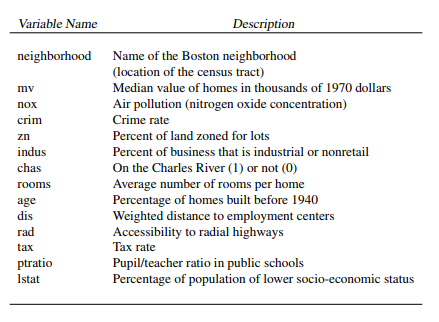

In [127]:
from IPython.display import Image
Image(filename='data_dictionary.png',width=500, height=700)

In [6]:
#check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [7]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [8]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston_input.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

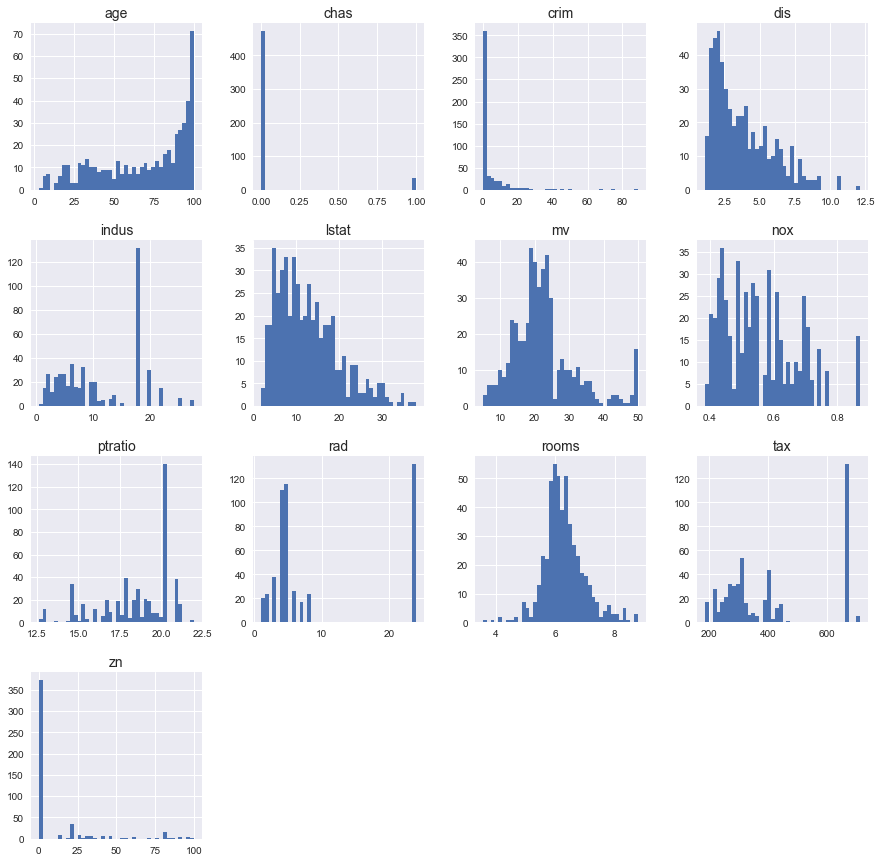

In [9]:
boston_input.hist(bins=40,figsize=(15,15))
plt.show()

##### Comment: Histograms
The histograms above show that the variables have a variety of distributions. The variable 'rooms' is normally distributed, while most others have various skewed distributions. Importantly, the target variable 'mean value' (mv) generally follows a normal distrubution. We will take a little bit deeper dive between price and rooms.

In [10]:
boston_df = boston_input.loc[:, 'rooms':'mv']

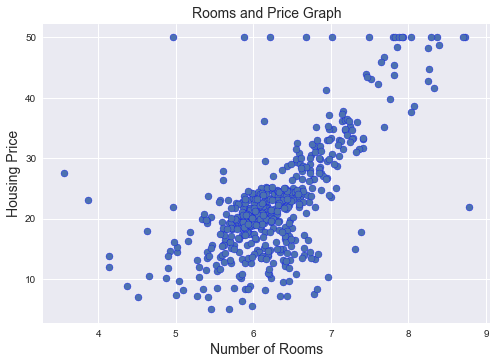

In [11]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Number of Rooms')
axis.set_ylabel('Housing Price')
plt.title('Rooms and Price Graph')
scatter_plot = axis.scatter(boston_df['rooms'], 
    boston_df['mv'],
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

##### Comment: Rooms and Housing Price
The scatter plot above shows the expected strong correlation between the number of rooms in a house and the price of the house. This shows that with any modeling that attempts to predict the mean value of housing prices the number of rooms is a variable that should be included.  

In [12]:
# correlation heat map to review all variables in the dataset
def corr_chart(boston_input_corr):
    corr=boston_input_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 576x396 with 0 Axes>

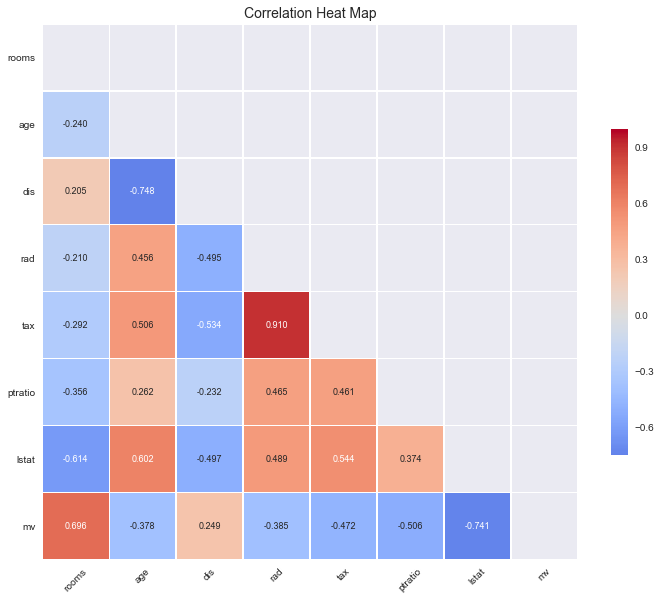

In [13]:
corr_chart(boston_input_corr = boston_df) 

#### Comment: Variable Correlations
The correlation plot further confirms that the number of rooms has the strongest positive correlation to the mean value.  'Lstat', the percentage of population with negative socio-economic class, has the strongest negative correlation to mean value and is almost equally as strong as the number of rooms.  

## Data Preparation

### Standardization

In [14]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston_input.mv,\
    boston_input.crim,\
    boston_input.zn,\
    boston_input.indus,\
    boston_input.chas,\
    boston_input.nox,\
    boston_input.rooms,\
    boston_input.age,\
    boston_input.dis,\
    boston_input.rad,\
    boston_input.tax,\
    boston_input.ptratio,\
    boston_input.lstat]).T

In [15]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [16]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.253e+01 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


In [17]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


### Split x and y

In [18]:
y = model_data[:, 0]  # response variable
X = model_data[:, 1:13] # all predictor variables

In [19]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Create Train/Test Split

In [20]:
# Split data into a train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=RANDOM_SEED)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 12)
(404,)
(102, 12)
(102,)


## Linear Regression / Ordinary Least Squares Model

In [21]:
#Building the model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, y_train)

# Fit Statistics on the Training Set
from math import sqrt
print('Linear Regression RMSE (train): ', round(sqrt(sklearn.metrics.mean_squared_error(y_train, lm.predict(X_train))),4))
# Explained variance score: 1 is perfect prediction
print('R Squared (train): %.4f' % r2_score(y_train, lm.predict(X_train)))

Linear Regression RMSE (train):  0.5078
R Squared (train): 0.7302


In [22]:
# Model Summary for further analysis
import statsmodels.api as sm
from scipy import stats

X_train_ols = sm.add_constant(X_train)
ols_model= sm.OLS(y_train, X_train_ols)
ols_result = ols_model.fit()
print(ols_result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     88.19
Date:                Sun, 27 Jan 2019   Prob (F-statistic):          3.14e-103
Time:                        12:43:04   Log-Likelihood:                -299.51
No. Observations:                 404   AIC:                             625.0
Df Residuals:                     391   BIC:                             677.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.026      0.220      0.8

### Comment

From the summary we see that variables x3 and x7 are not sgnificant predictors. A suggestion would be to simplify the model by removing those variables.   
R-Squared is 0.73 which means that the model is capturing roughly 73% of variability in the data.

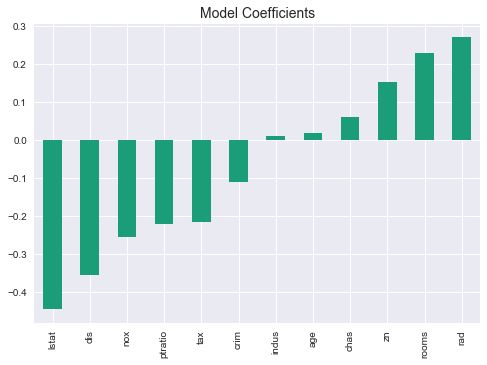

In [23]:
#checking the magnitude of coefficients
from pandas import Series
predictors = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']

coef = Series(lm.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients',colormap = 'Dark2')

Text(0.5,0,'Fitted Values')

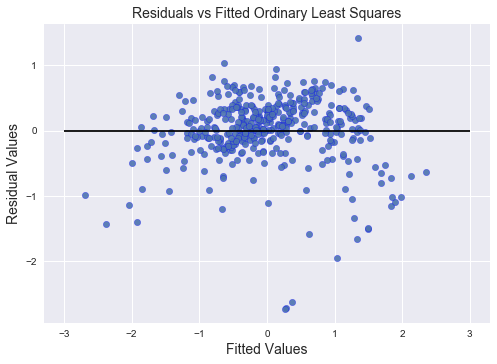

In [24]:
# Residuals Plot
plt.scatter(lm.predict(X_train),(lm.predict(X_train) - y_train), s=40, edgecolors='b', alpha = 0.9)
#plt.scatter(lm.predict(X_test),lm.predict(X_test)-y_test, c='g',s=40)
plt.hlines(y=0,xmin=-3,xmax=3)
plt.title('Residuals vs Fitted Ordinary Least Squares')
plt.ylabel('Residual Values')
plt.xlabel('Fitted Values')

### Comment
Residuals plot does not show any major patterns which confirms our assumption of a linear relationship between the outcome variable and the independent variables.

Linear Regression RMSE (test set):  0.5397


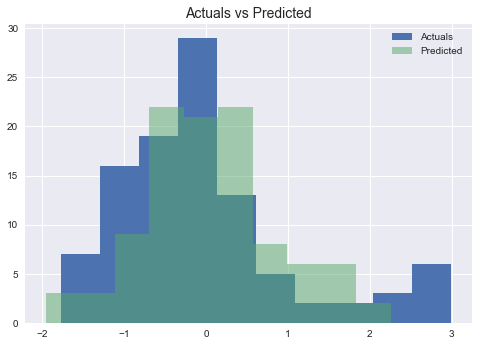

In [25]:
# Historgram of Predicted vs Actuals
plt.hist(y_test)
plt.hist(lm.predict(X_test),alpha=0.5)
plt.title('Actuals vs Predicted')
plt.gca().legend(('Actuals','Predicted'))

print('Linear Regression RMSE (test set): ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, lm.predict(X_test))),4))

### Comment
The shape of the predicted values mirrors the shape of the target varaible. There is a slight heavy right tail in the actuals, which could be pulling the predicted values to be higher than actuals on the right. 

In [26]:
# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = ols_result.model.exog
columns = ['constant','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = columns
vif.round(2)


,VIF Factor,Features
0,1.01,constant
1,1.73,crim
2,2.52,zn
3,3.81,indus
4,1.07,chas
5,4.42,nox
6,1.93,rooms
7,3.23,age
8,4.21,dis
9,8.08,rad


### Comment
All VIF values are below 10, which means we do not have any multicollinearity issues in the data. The only variable that is close is Tax at 9.81. A suggestion would be to remove this variable from the model. 

Text(0.5,1,'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

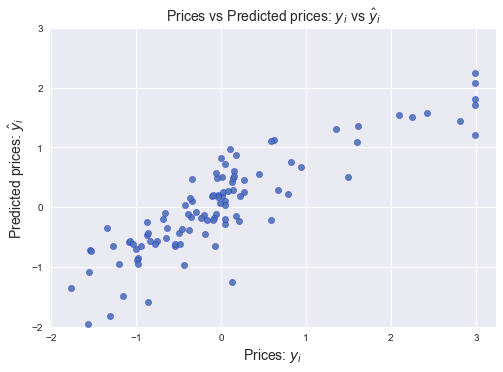

In [27]:
# Actuals vs Predicted Scatter
plt.scatter(y_test, lm.predict(X_test),s=40, edgecolors='b', alpha = 0.9)
plt.ylim((-2,3))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

##### Comment: Linear Regression 
Ideally the model should produce a more linear relationship. However, as the home price increases the quality of the linear relationship decreases.  An example of this is at $50,000 price range. Given the degredation in the linear relationship we will examine the mean squared error to evaluate the model performance. This model provides a baseline RMSE of 0.51 and 0.54 on the train and test sets.  

## Ridge Model

In [28]:
rid = Ridge()
rid.fit(X_train, y_train)

# Fit Statistics on the Training Set
print('Ridge Regression RMSE (train): ', round(sqrt(sklearn.metrics.mean_squared_error(y_train, rid.predict(X_train))),4))
# Explained variance score: 1 is perfect prediction
print('Ridge Regression R Squared (train): %.4f' % r2_score(y_train, rid.predict(X_train)))

Ridge Regression RMSE (train):  0.5079
Ridge Regression R Squared (train): 0.7302


In [29]:
from sklearn.model_selection import GridSearchCV
# GridSearch for hyperparameter tuning
alphas = np.array([1,0.1,0.5,0.01,0.05,0.001,0])
# create and fit a ridge regression model, testing each alpha
grid = GridSearchCV(estimator=rid, param_grid=dict(alpha=alphas),scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# summarize the results of the grid search
print('Ridge Regression RMSE (train) with Grid Search: %.2f' % sqrt(grid.best_score_*-1))
print('Best Performance alpha value: %.2f' % grid.best_estimator_.alpha)

Ridge Regression RMSE (train) with Grid Search: 0.53
Best Performance alpha value: 1.00


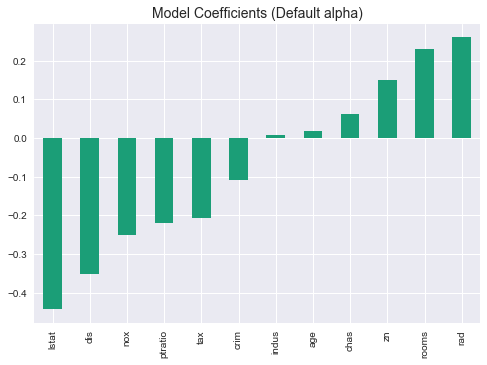

In [30]:
#checking the magnitude of coefficients
coef = Series(rid.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients (Default alpha)',colormap = 'Dark2')

Text(0.5,0,'Fitted Values')

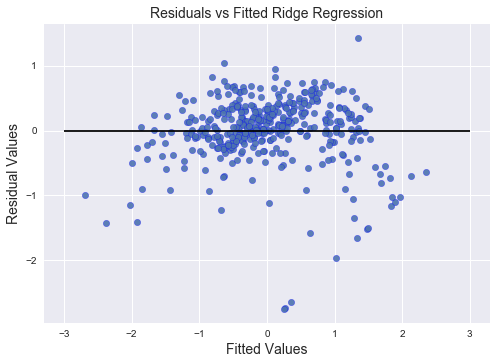

In [31]:
# Residuals Plot
plt.scatter(rid.predict(X_train),(rid.predict(X_train) - y_train), s=40, edgecolors='b', alpha = 0.9)
#plt.scatter(lm.predict(X_test),lm.predict(X_test)-y_test, c='g',s=40)
plt.hlines(y=0,xmin=-3,xmax=3)
plt.title('Residuals vs Fitted Ridge Regression')
plt.ylabel('Residual Values')
plt.xlabel('Fitted Values')

Ridge Regression RMSE (test):  0.5397


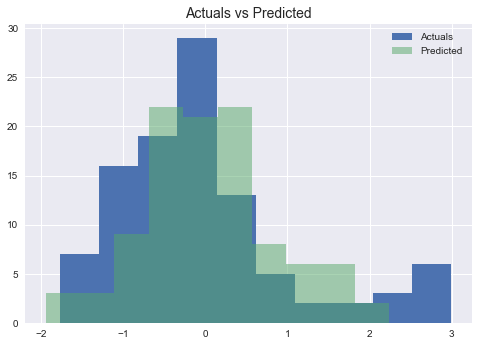

In [32]:
# Historgram of Predicted vs Actuals
plt.hist(y_test)
plt.hist(rid.predict(X_test),alpha=0.5)
plt.title('Actuals vs Predicted')
plt.gca().legend(('Actuals','Predicted'))

print('Ridge Regression RMSE (test): ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, rid.predict(X_test))),4))

Text(0.5,1,'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

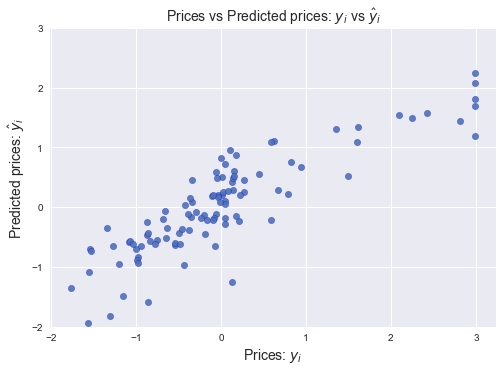

In [33]:
# Actuals vs Predicted Scatter
plt.scatter(y_test, rid.predict(X_test),s=40, edgecolors='b', alpha = 0.9)
plt.ylim((-2,3))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

##### Comment: Ridge Regression
The Ridge Regression model with default alpha = 1.0 shows no improvement over the standard Linear Regression model. This high level of regularization may reflect that many of the predictor variables do not provide significant value to the model. The correlation plot indicated this when it showed only number of rooms and community socio-economic status had strong positive and negative corrlations. Additionally, as with the Linear Regression model, the linear relationship appears to break down with higher-value properties. This may further demonstrate a limitation in the linear relationship between the predictor variables and the home price.

## Lasso Model

In [34]:
las = Lasso()
las.fit(X_train, y_train)

# Fit Statistics on the Training Set
print('Root Mean Squared Error: ', round(sqrt(sklearn.metrics.mean_squared_error(y_train, las.predict(X_train))),4))
# Explained variance score: 1 is perfect prediction
print('R Squared: %.4f' % r2_score(y_train, las.predict(X_train)))

Root Mean Squared Error:  0.9777
R Squared: 0.0000


In [35]:
# GridSearch for hyperparameter tuning
alphas = np.array([1.0,0.0,0.1,0.01,0.001,0.0001])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# summarize the results of the grid search
print('Lasso Regression RMSE (train): %.4f' % sqrt(grid.best_score_*-1))
print('Best Performance alpha value: %.4f' % grid.best_estimator_.alpha)

Lasso Regression RMSE (train): 0.5268
Best Performance alpha value: 0.0010


/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  

In [36]:
# Re-fitting the model with new alpha value
las = Lasso(alpha = 0.001)
las.fit(X_train, y_train)

# Fit Statistics on the Training Set
print('Optimized Lasso Regression RMSE (test): ', round(sqrt(sklearn.metrics.mean_squared_error(y_train, las.predict(X_train))),4))
# Explained variance score: 1 is perfect prediction
print('Optimized Lasso Regression R Squared (test): %.4f' % r2_score(y_train, las.predict(X_train)))


Optimized Lasso Regression RMSE (test):  0.5079
Optimized Lasso Regression R Squared (test): 0.7301


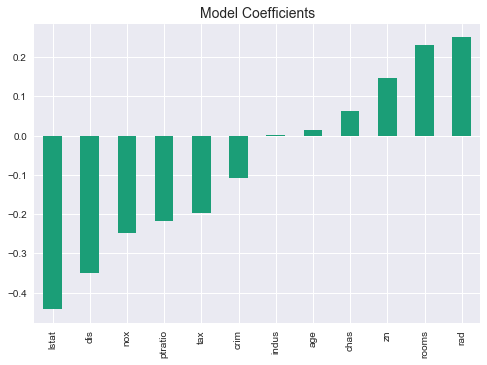

In [37]:
#checking the magnitude of coefficients
coef = Series(las.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients',colormap = 'Dark2')

Text(0.5,0,'Fitted Values')

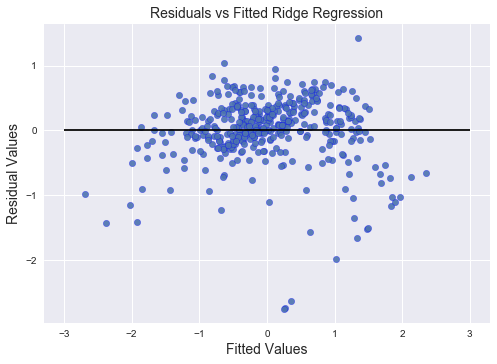

In [38]:
# Residuals Plot
plt.scatter(rid.predict(X_train),(las.predict(X_train) - y_train), s=40, edgecolors='b', alpha = 0.9)
#plt.scatter(lm.predict(X_test),lm.predict(X_test)-y_test, c='g',s=40)
plt.hlines(y=0,xmin=-3,xmax=3)
plt.title('Residuals vs Fitted Ridge Regression')
plt.ylabel('Residual Values')
plt.xlabel('Fitted Values')

Lasso Regression RMSE (test)::  0.5399


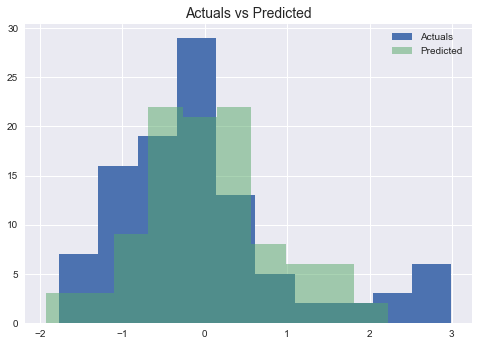

In [39]:
# Historgram of Predicted vs Actuals
plt.hist(y_test)
plt.hist(las.predict(X_test),alpha=0.5)
plt.title('Actuals vs Predicted')
plt.gca().legend(('Actuals','Predicted'))

print('Lasso Regression RMSE (test):: ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, las.predict(X_test))),4))

Text(0.5,1,'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

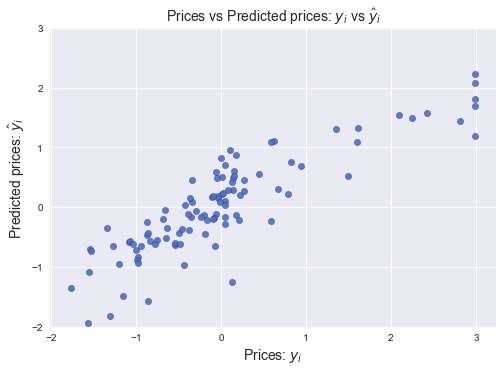

In [40]:
# Actuals vs Predicted Scatter
plt.scatter(y_test, las.predict(X_test),s=40, edgecolors='b', alpha = 0.9)
plt.ylim((-2,3))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

##### Comment: Lasso
The Lasso model with default parameters also shows a strong linear relationship until it reaches the homes with the largest values. All three models perform similarly on the test and train sets.   

## Elastic Net Model

In [41]:
elas = ElasticNet()
elas.fit(X_train, y_train)

# Fit Statistics on the Training Set
print('Elastic Net RMSE (train): ', round(sqrt(sklearn.metrics.mean_squared_error(y_train, elas.predict(X_train))),4))
# Explained variance score: 1 is perfect prediction
print('Elastic Net R Squared (train): %.4f' % r2_score(y_train, elas.predict(X_train)))

Elastic Net RMSE (train):  0.8523
Elastic Net R Squared (train): 0.2401


In [42]:
# GridSearch for hyperparameter tuning
alphas = np.array([1,0.1,0.01,0.001,0])
# create and fit a ridge regression model, testing each alpha
model = ElasticNet()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# summarize the results of the grid search
print('Optimized Elastic Net RMSE (train): %.2f' % sqrt(grid.best_score_*-1))
print('Best Performance alpha value: %.2f' % grid.best_estimator_.alpha)


Optimized Elastic Net RMSE (train): 0.53
Best Performance alpha value: 0.01


/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  

In [43]:
# Refitting the model
elas = ElasticNet(alpha = 0.01)
elas.fit(X_train, y_train)

# Fit Statistics on the Training Set
print('Optimized Elastic Net RMSE (train): ', round(sqrt(sklearn.metrics.mean_squared_error(y_train, elas.predict(X_train))),4))
# Explained variance score: 1 is perfect prediction
print('Optimized Elastic Net R Squared (train): %.4f' % r2_score(y_train, elas.predict(X_train)))

Optimized Elastic Net RMSE (train):  0.5097
Optimized Elastic Net R Squared (train): 0.7283


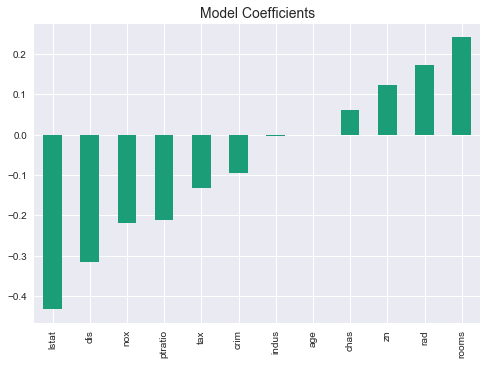

In [44]:
#checking the magnitude of coefficients
coef = Series(elas.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients',colormap = 'Dark2')

Text(0.5,0,'Fitted Values')

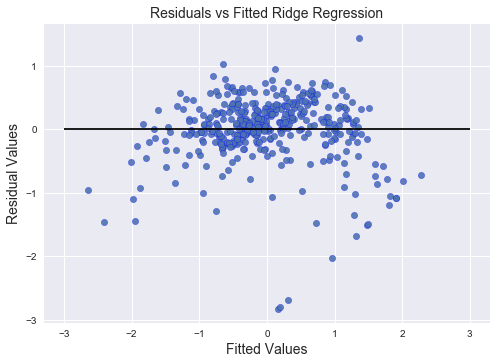

In [45]:
# Residuals Plot
plt.scatter(elas.predict(X_train),(elas.predict(X_train) - y_train), s=40, edgecolors='b', alpha = 0.9)
plt.hlines(y=0,xmin=-3,xmax=3)
plt.title('Residuals vs Fitted Ridge Regression')
plt.ylabel('Residual Values')
plt.xlabel('Fitted Values')

Elastic Net RMSE (test):  0.5428


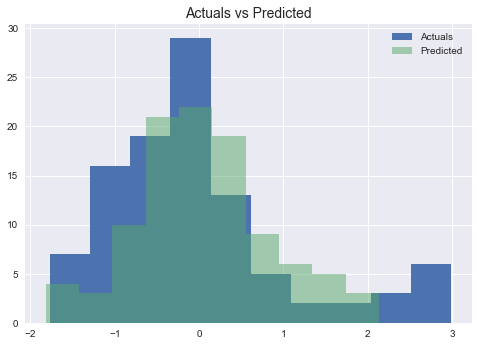

In [46]:
# Historgram of Predicted vs Actuals
plt.hist(y_test)
plt.hist(elas.predict(X_test),alpha=0.5)
plt.title('Actuals vs Predicted')
plt.gca().legend(('Actuals','Predicted'))

print('Elastic Net RMSE (test): ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, elas.predict(X_test))),4))

Text(0.5,1,'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

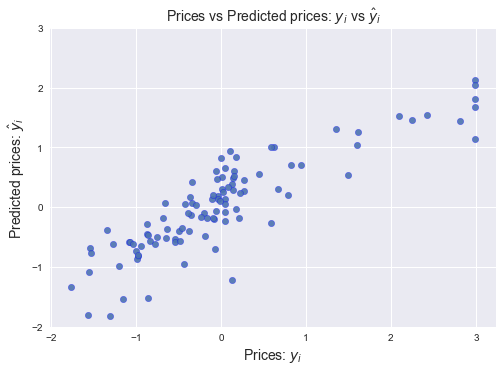

In [47]:
# Actuals vs Predicted Scatter
plt.scatter(y_test, elas.predict(X_test),s=40, edgecolors='b', alpha = 0.9)
plt.ylim((-2,3))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

##### Comment: Elastic Net Regression
Similar to the standard Linear Regression, Ridge, and Lasso models, Elastic Net predicts home prices in a linear relationship until it reaches higher-value properties.  At that point, the linear relationship appears to break down. Overall, the Elastic Net model with optimized alpha appears to have a slightly worse perfomance on the test set than all other models. 

### Comparing Models

In [48]:
#OLS linear regression 
print('Linear Regression Model R-Squared: %.4f' % r2_score(y_train, lm.predict(X_train)))
print('Linear Regression RMSE (test set): ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, lm.predict(X_test))),4))
print('')

#ridge regression 
print('Ridge Regression Model R Squared: %.4f' % r2_score(y_train, rid.predict(X_train)))
print('Ridge Regression RMSE (test set): ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, rid.predict(X_test))),4))
print('')

#lasso 
print('Optimized Lasso Regression Model R Squared (test): %.4f' % r2_score(y_train, las.predict(X_train)))
print('Optimized Lasso Regression RMSE (test set):: ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, las.predict(X_test))),4))
print('')

#elastic net
print('Optimized Elastic Net Model R Squared: %.4f' % r2_score(y_train, elas.predict(X_train)))
print('Optimized Elastic Net RMSE (test set): ', round(sqrt(sklearn.metrics.mean_squared_error(y_test, elas.predict(X_test))),4))


Linear Regression Model R-Squared: 0.7302
Linear Regression RMSE (test set):  0.5397

Ridge Regression Model R Squared: 0.7302
Ridge Regression RMSE (test set):  0.5397

Optimized Lasso Regression Model R Squared (test): 0.7301
Optimized Lasso Regression RMSE (test set)::  0.5399

Optimized Elastic Net Model R Squared: 0.7283
Optimized Elastic Net RMSE (test set):  0.5428


##### Comment: Model Comparision 
Comparing the results side-by-side shows the different performance of the four regression models.  Linear and Ridge regressions show the lowest error on the test dataset at 0.5397 and the highest model R-Squared at 0.7302. Optimized Lasso Regression is only a slightly worse with RMSE of 0.5399 and R-Squared of 0.7301. Based on comprehensive performance, management may want to select the Linear or Ridge Regression models.

### Training Models on Full Data

Because the data set is small, we further analyze the four models on the full data set to see if the additional observations produce different results or potentially improve performance with the use of cross-validation.  Because three of the regression models are regularized the risk of over-fitting is somewhat minimized.

In [49]:
#use full data sets to compare CV results 
print(X.shape)
print(y.shape)

(506, 12)
(506,)


In [50]:
# Compare four variations of regression models 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#REFERENCE: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# prepare models
model_compare = []
model_compare.append(('Linear Regression', LinearRegression()))
model_compare.append(('Ridge Regression', Ridge(alpha=1.0)))
model_compare.append(('Lasso Regression', Lasso(alpha= 0.001)))
model_compare.append(('Elastic Net Regression', ElasticNet(alpha = 0.01)))

In [51]:
# evaluate each model using CV
results = []
names = []
scoring = 'neg_mean_squared_error'

for name, model in model_compare:
    kfold = model_selection.KFold(n_splits=10, random_state=RANDOM_SEED)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message = "%s RMSE: %f" % (name, np.sqrt((cv_results.mean()*-1)))
    print(message)

Linear Regression RMSE: 0.631923
Ridge Regression RMSE: 0.630866
Lasso Regression RMSE: 0.631646
Elastic Net Regression RMSE: 0.629465


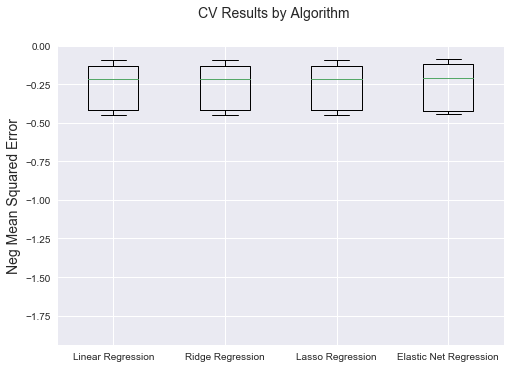

In [52]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('CV Results by Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Neg Mean Squared Error')
plt.show()

##### Comment: Comparison of Models
Overall, the four models with default parameters provide similar performance on the full data set. All of the RMSE values are higher, which may be due to the increase in the number of observations.  Elastic Net has an RMSE slighly lower than the other three models. We will again attempt to optimize the Elastic Net model to see if performance can be further improved.  

### Grid Search with Elastic Net

In [53]:
#import Grid Search package
from sklearn.model_selection import GridSearchCV

In [54]:
#define parameters grid
parametersGrid = {"max_iter": [1, 5, 10],
                  "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [55]:
enet_grid = GridSearchCV(elas, parametersGrid, scoring=scoring, cv=10)

In [56]:
enet_grid.fit(X, y)
enet_grid_Y_pred = grid.predict(X)

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/ksenialuu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [57]:
# summarize the results of the grid search
print('Optimized Elastic Net RMSE: %.2f' % sqrt(enet_grid.best_score_*-1))
print('Optimized Elastic Net Best Performing alpha: %.2f' % enet_grid.best_estimator_.alpha)
print('Optimized Elastic Net Best Performing L1 Ratio: %.2f' % enet_grid.best_estimator_.l1_ratio)

Optimized Elastic Net RMSE: 0.61
Optimized Elastic Net Best Performing alpha: 0.10
Optimized Elastic Net Best Performing L1 Ratio: 0.00


### Comment: Elastic Net Optimization
With further optimization, the Optimized Elastic Net RMSE improved from 0.629 to 0.61. Although it is trained and tested on the same data set, strong regularization should minimize the risk of over-fitting.  With the optimal L1 Ratio of zero, the Elastic Net model shows preference for the L2 regularization of the Ridge Regression model. This reflects the previous results where the performance of Ridge and Elastic Net were close.  

### Conclusion

Comparison of the four linear regression models showed that an optimized Elastic Net model emphasizing L2 regularization slightly out-performed pure Ridge Regression. This exercise also showed that optimization via grid search can improve performance especially when the models appear to provide similar results. 
<br>
<br>
Although few variables appeared to show strong performance, the number of rooms appeared to be the most important. The socio-economic status of individuals in the neighborhood also appeared to have strong negative correlation.  
<br>
To further develop the model, management could explore the impact of transformations on the variables.  Initial EDA showed that several of the variables had skewed distributions.  Additionally, management could explore polynomials and interactions to see if these improved performance, particularly with higher-value homes where the linear relationship appears to brake down.  Finally, managment could also explore other models such as Random Forests, boosting, or neural networks which may be better able to predict prices where there is less of a linear relationship. 